In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

In [2]:
af=pd.read_csv(r'D:\桌面快捷\paper\fars数据\csv2017\trippub.csv')

In [3]:
af1=af.loc[:,['HOUSEID','HHVEHCNT','URBRUR','TRPTRANS','TRPMILAD','WTTRDFIN','PSGR_FLG','TRVLCMIN','TRPHHVEH','R_AGE_IMP','WHYTRP1S']]

In [4]:
af2=af1[(af1['TRPMILAD']>=0) & (af1['TRPMILAD']<=75.)]
af3=af2[(af2['TRVLCMIN']>0)&(af2['TRVLCMIN']<=150)]
af4=af3[af3['TRPTRANS']>0]
af4.loc[(af4['TRPTRANS'] >= 3) & (af4['TRPTRANS'] <= 9), 'TRPTRANS'] = 3
af4.loc[(af4['TRPTRANS'] >= 11) & (af4['TRPTRANS'] <= 18), 'TRPTRANS'] = 4
af4.loc[af4['TRPTRANS'] == 10, 'TRPTRANS'] = 5
af4.loc[af4['TRPTRANS'] >= 19, 'TRPTRANS'] = 6
af4.loc[af4['WHYTRP1S']==1,'WHYTRP1S']=1
af4.loc[af4['WHYTRP1S']==10,'WHYTRP1S']=2
af4.loc[af4['WHYTRP1S']==20,'WHYTRP1S']=3
af4.loc[af4['WHYTRP1S']==30,'WHYTRP1S']=4
af4.loc[af4['WHYTRP1S']==40,'WHYTRP1S']=5
af4.loc[af4['WHYTRP1S']==50,'WHYTRP1S']=6
af4.loc[af4['WHYTRP1S']==70,'WHYTRP1S']=7
af4.loc[af4['WHYTRP1S']==80,'WHYTRP1S']=8
af4.loc[af4['WHYTRP1S']==97,'WHYTRP1S']=9
af4

,HOUSEID,HHVEHCNT,URBRUR,TRPTRANS,TRPMILAD,WTTRDFIN,PSGR_FLG,TRVLCMIN,TRPHHVEH,R_AGE_IMP,WHYTRP1S
0,30000007,5,1,3,5.847584,75441.905796,2,15,1,67,3
1,30000007,5,1,3,5.741650,75441.905796,2,20,1,67,1
4,30000007,5,1,3,2.508975,80122.686739,2,15,1,28,3
5,30000007,5,1,3,2.501169,80122.686739,2,15,1,28,1
6,30000008,4,2,3,8.606250,23062.857428,2,15,1,55,2
...,...,...,...,...,...,...,...,...,...,...,...
923567,50515573,0,1,1,1.168000,223357.457435,-1,27,2,52,2
923568,50515573,0,1,1,0.238000,223357.457435,-1,8,2,52,6
923569,50515573,0,1,1,0.238000,223357.457435,-1,5,2,52,2
923570,50515573,0,1,1,0.867000,223357.457435,-1,25,2,52,5


In [5]:
af4['speed']=af4['TRPMILAD']/(af4['TRVLCMIN']/60)
af4.describe()

C:\Users\57273\AppData\Local\Temp\ipykernel_15404\3387200067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  af4['speed']=af4['TRPMILAD']/(af4['TRVLCMIN']/60)


,HOUSEID,HHVEHCNT,URBRUR,TRPTRANS,TRPMILAD,WTTRDFIN,PSGR_FLG,TRVLCMIN,TRPHHVEH,R_AGE_IMP,WHYTRP1S,speed
count,9.028190e+05,902819.000000,902819.000000,902819.000000,902819.000000,9.028190e+05,902819.000000,902819.000000,902819.000000,902819.000000,902819.000000,902819.000000
mean,3.489441e+07,2.228007,1.214437,2.868018,7.424603,4.029072e+05,1.403570,18.385186,1.176081,49.213623,3.689866,21.964620
std,5.043216e+06,1.194105,0.410432,0.671581,10.164413,8.577738e+05,1.014527,16.780193,0.380889,20.569336,2.550024,17.899639
min,3.000001e+07,0.000000,1.000000,1.000000,0.000000,2.677250e+03,-1.000000,1.000000,1.000000,5.000000,1.000000,0.000000
25%,3.025550e+07,1.000000,1.000000,3.000000,1.436249,3.915369e+04,1.000000,8.000000,1.000000,34.000000,1.000000,9.890666
50%,3.051147e+07,2.000000,1.000000,3.000000,3.672024,1.011777e+05,2.000000,15.000000,1.000000,53.000000,3.000000,18.630280
75%,4.035512e+07,3.000000,1.000000,3.000000,9.010008,3.356761e+05,2.000000,25.000000,1.000000,65.000000,6.000000,30.408777
max,5.051557e+07,12.000000,2.000000,6.000000,75.000000,1.151800e+07,2.000000,150.000000,2.000000,92.000000,9.000000,2181.780000


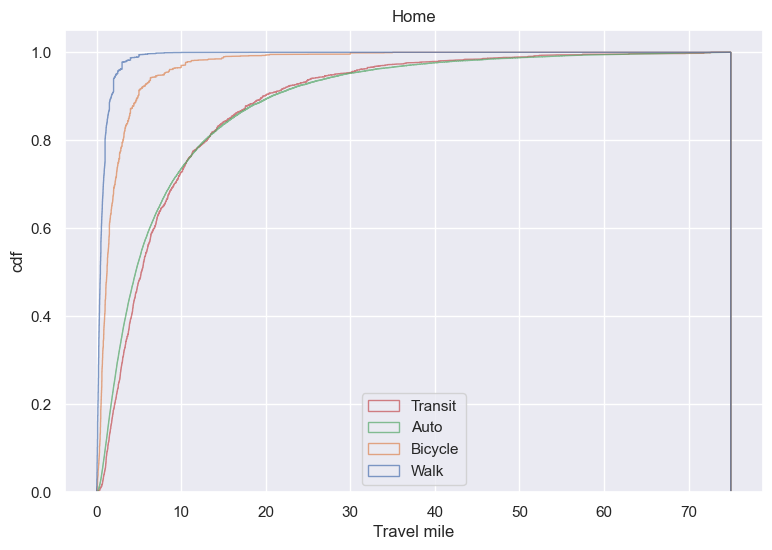

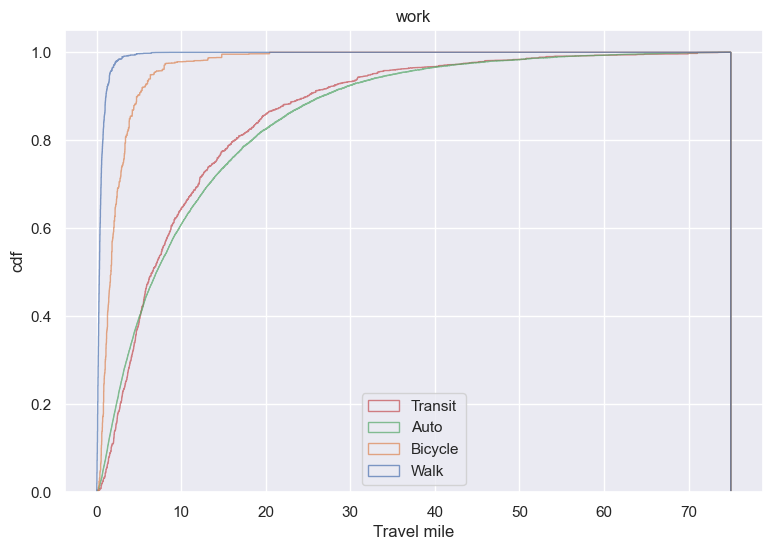

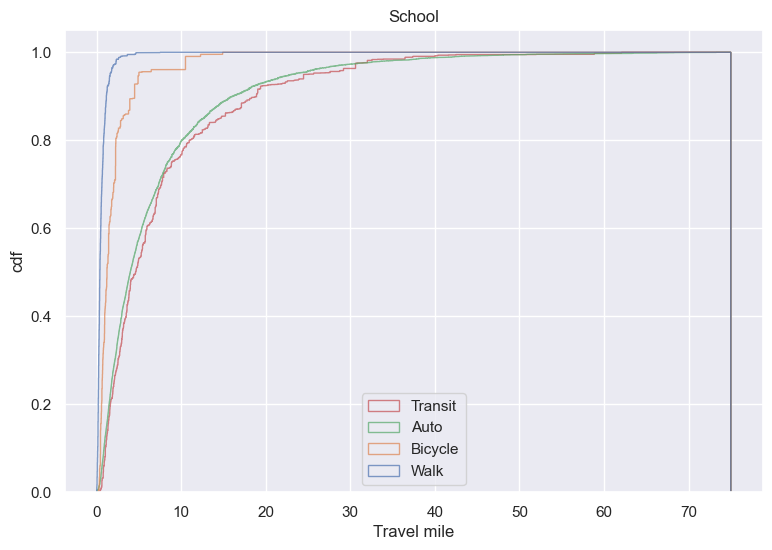

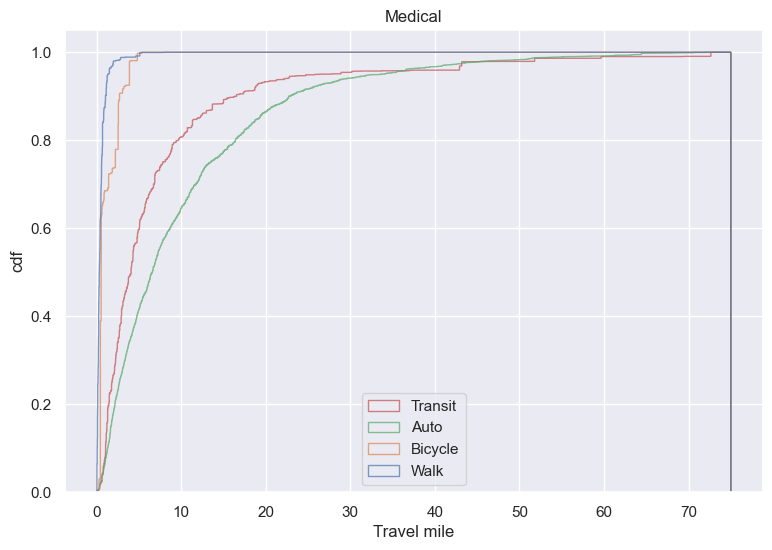

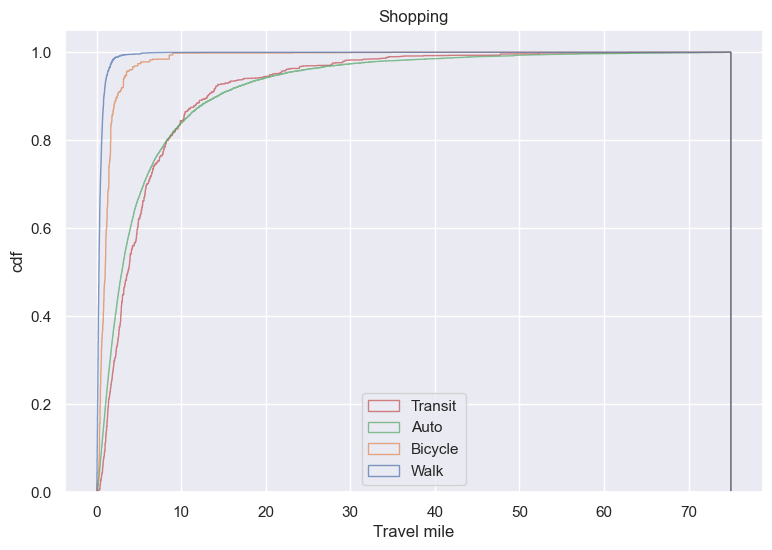

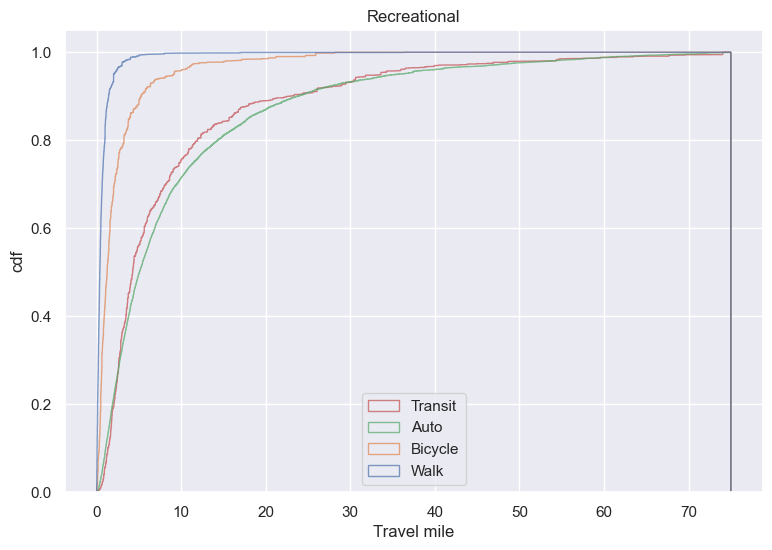

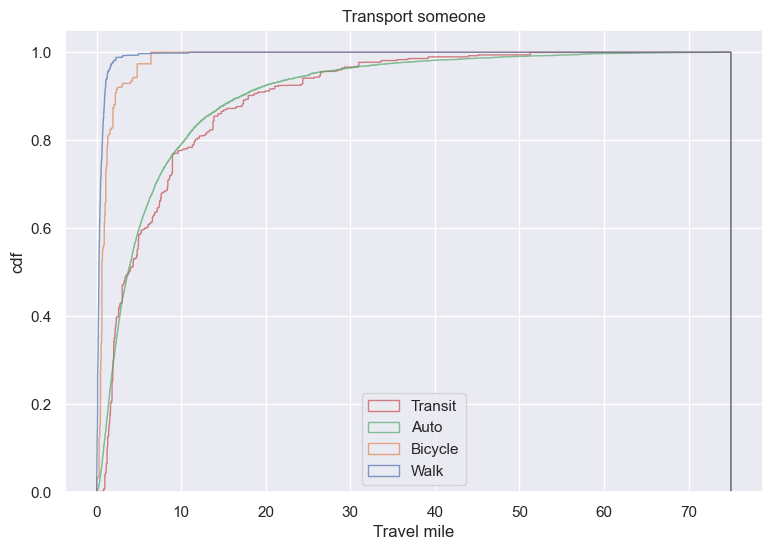

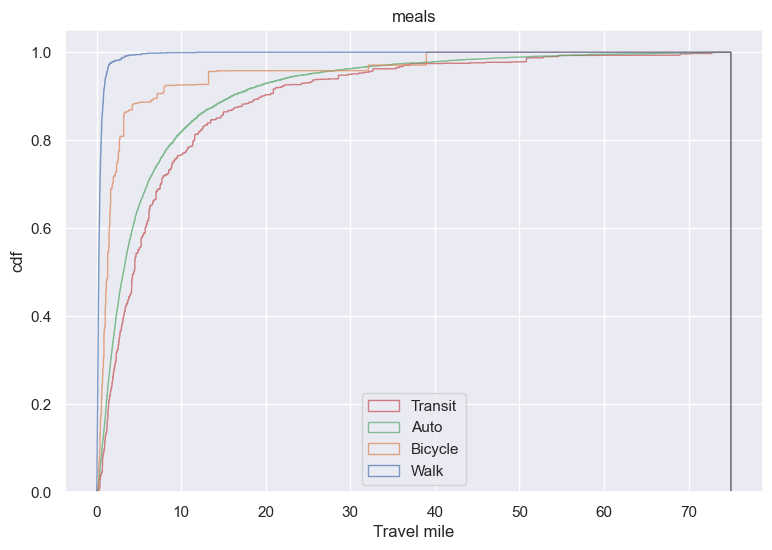

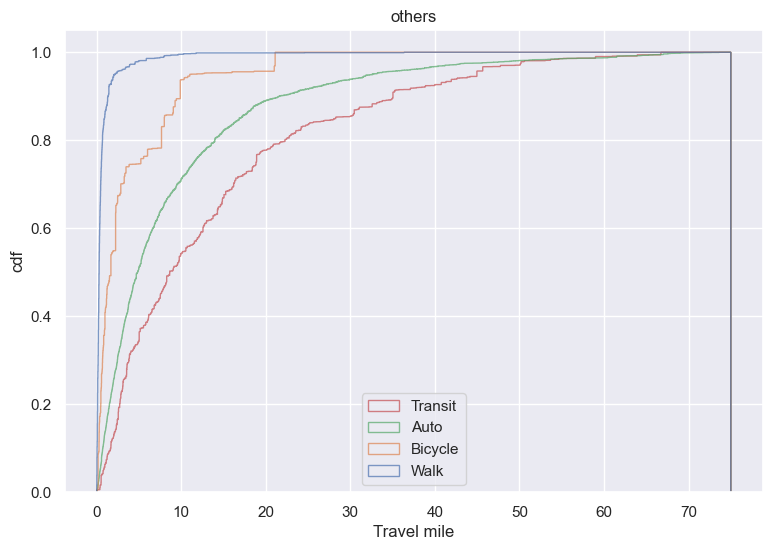

In [9]:
for i in np.arange(1,10):
    df1=af4[(af4['TRPTRANS']==1)&(af4['WHYTRP1S']==i)]
    df2=af4[(af4['TRPTRANS']==2)&(af4['WHYTRP1S']==i)]
    df3=af4[(af4['TRPTRANS']==3)&(af4['WHYTRP1S']==i)]
    df4=af4[(af4['TRPTRANS']==4)&(af4['WHYTRP1S']==i)]
    data1=df1['TRPMILAD']
    weight1=df1['WTTRDFIN']
    data2=df2['TRPMILAD']
    weight2=df2['WTTRDFIN']
    data3=df3['TRPMILAD']
    weight3=df3['WTTRDFIN']
    data4=df4['TRPMILAD']
    weight4=df4['WTTRDFIN']
    data=[data1,data2,data3,data4]
    weight=[weight1,weight2,weight3,weight4]
    label1=['Walk','Bicycle','Auto','Transit']
    title=['Home','work','School','Medical','Shopping','Recreational','Transport someone','meals','others']
    fig = plt.figure(figsize=(9, 6))
    plt.hist(data, bins=5000, density=True,range=(0,75), cumulative= True, label=label1,alpha=0.7,histtype='step',weights=weight)
    plt.xlabel('Travel mile')
    plt.ylabel('cdf')
    plt.title(title[i-1])
    plt.legend()
    plt.show()

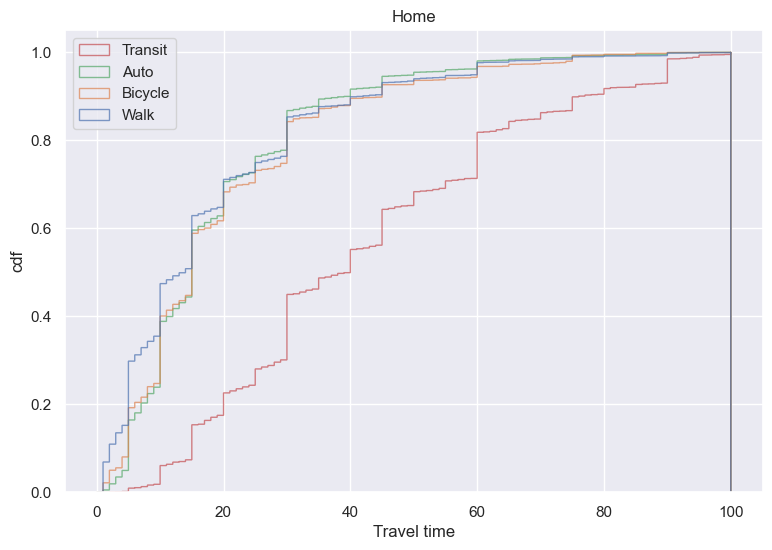

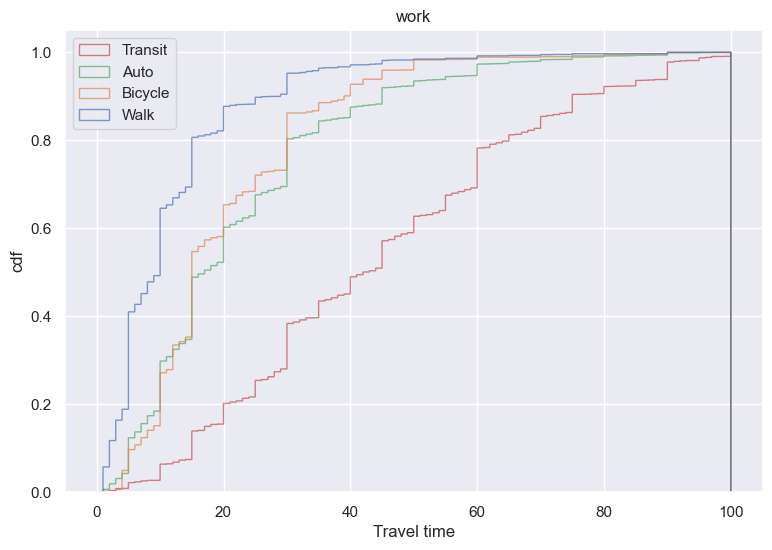

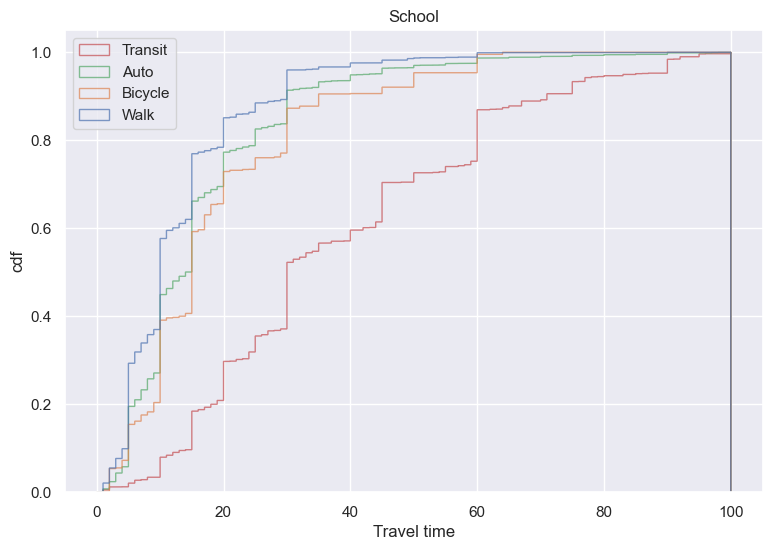

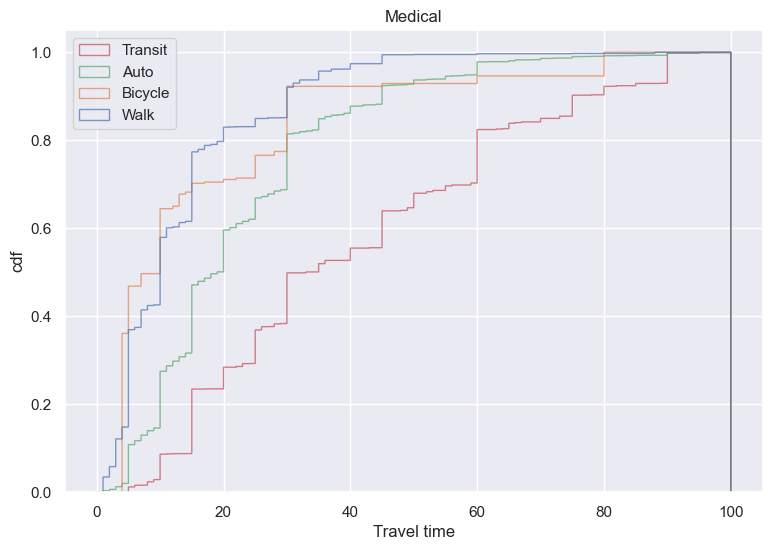

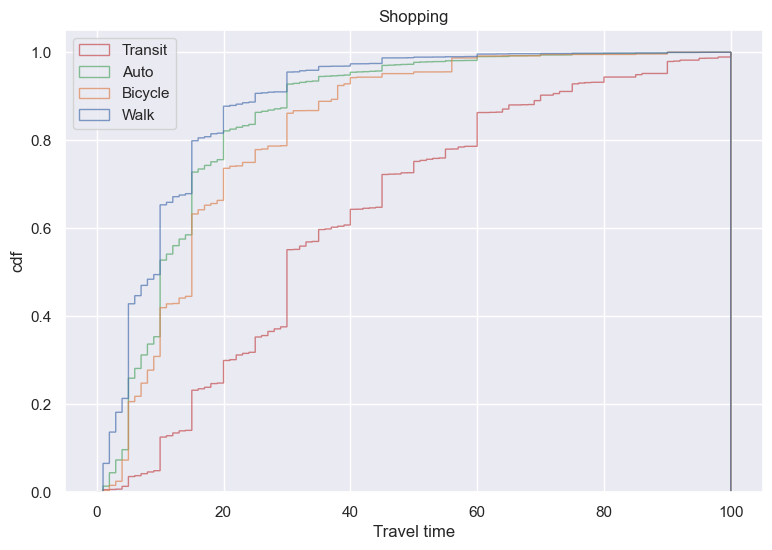

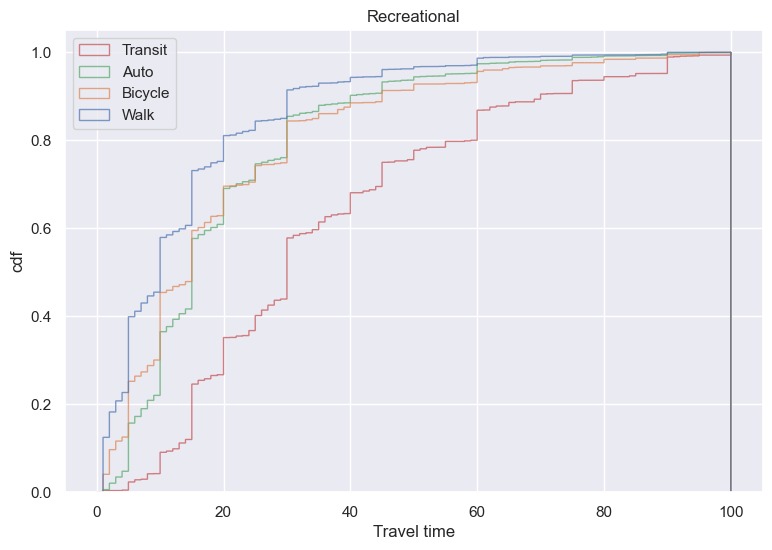

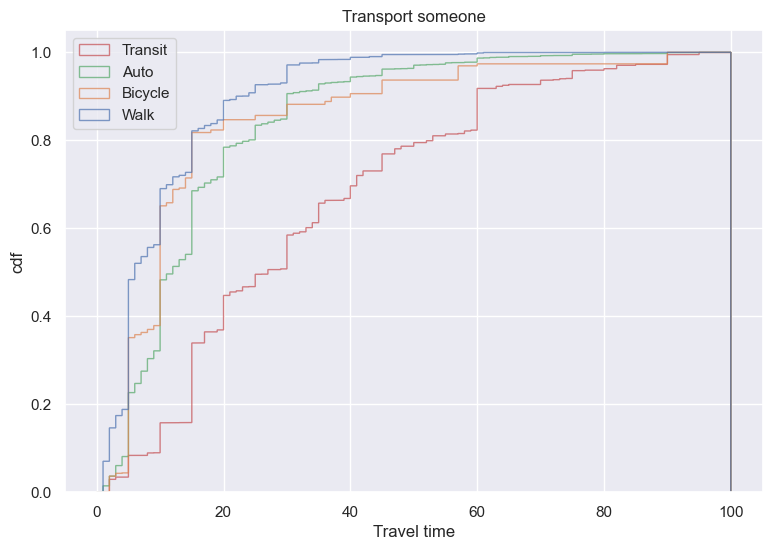

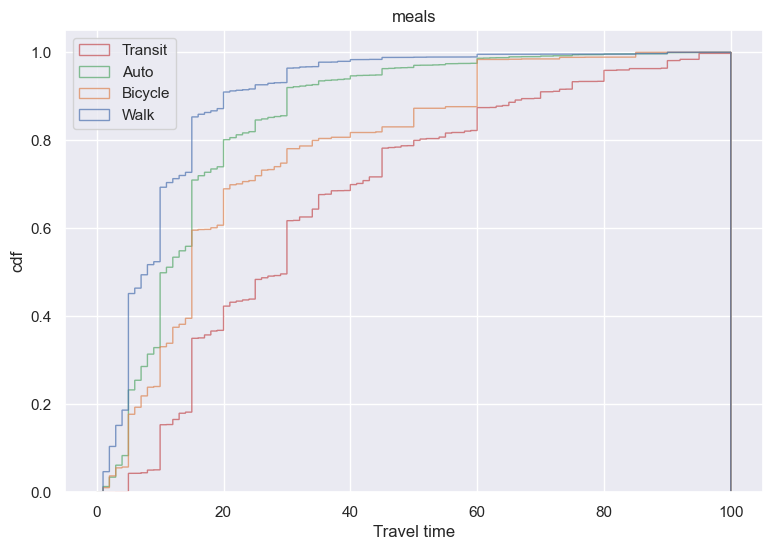

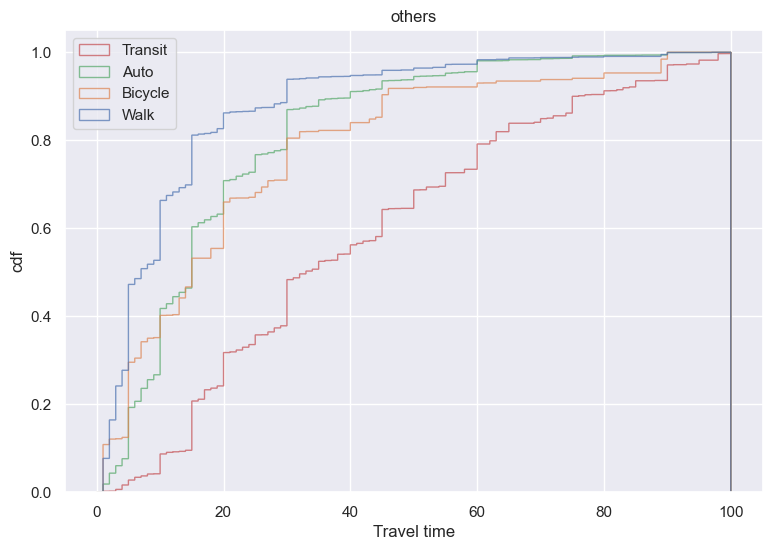

In [11]:
for i in np.arange(1,10):
    ef1=af4[(af4['TRPTRANS']==1)&(af4['WHYTRP1S']==i)]
    ef2=af4[(af4['TRPTRANS']==2)&(af4['WHYTRP1S']==i)]
    ef3=af4[(af4['TRPTRANS']==3)&(af4['WHYTRP1S']==i)]
    ef4=af4[(af4['TRPTRANS']==4)&(af4['WHYTRP1S']==i)]
    data1e=ef1['TRVLCMIN']
    weight1e=ef1['WTTRDFIN']
    data2e=ef2['TRVLCMIN']
    weight2e=ef2['WTTRDFIN']
    data3e=ef3['TRVLCMIN']
    weight3e=ef3['WTTRDFIN']
    data4e=ef4['TRVLCMIN']
    weight4e=ef4['WTTRDFIN']
    datae=[data1e,data2e,data3e,data4e]
    weighte=[weight1e,weight2e,weight3e,weight4e]
    title=['Home','work','School','Medical','Shopping','Recreational','Transport someone','meals','others']
    fig = plt.figure(figsize=(9, 6))
    plt.hist(datae, bins=5000, density=True,range=(0,100), cumulative= True, label=label1,alpha=0.7,histtype='step',weights=weighte)
    plt.xlabel('Travel time')
    plt.ylabel('cdf')
    plt.title(title[i-1])
    plt.legend()
    plt.show()

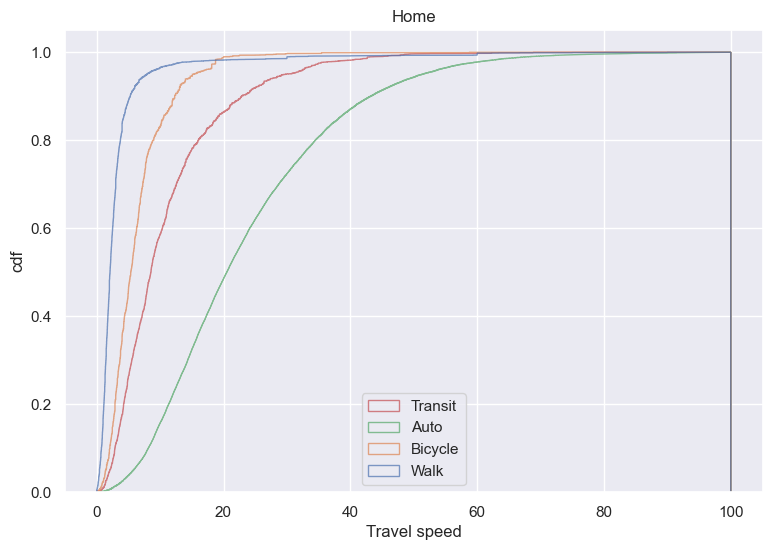

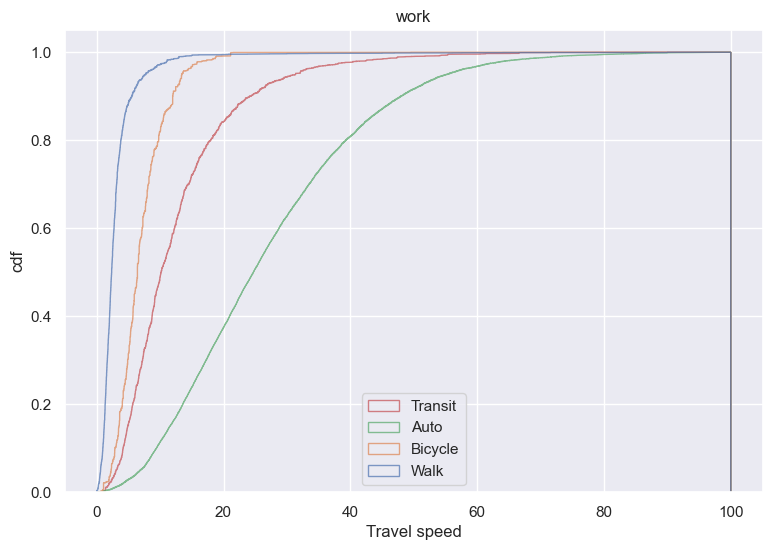

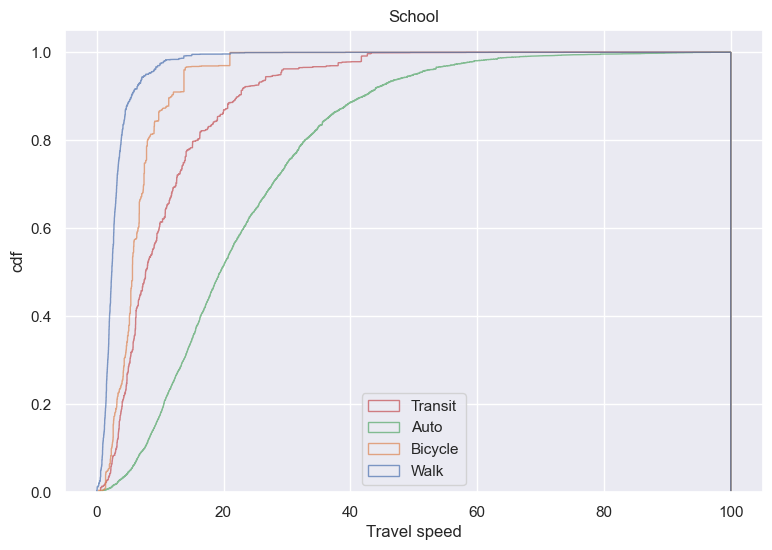

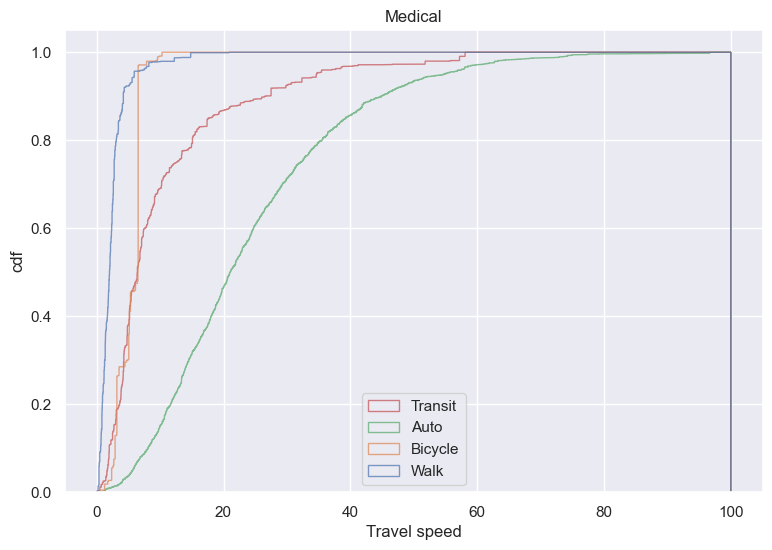

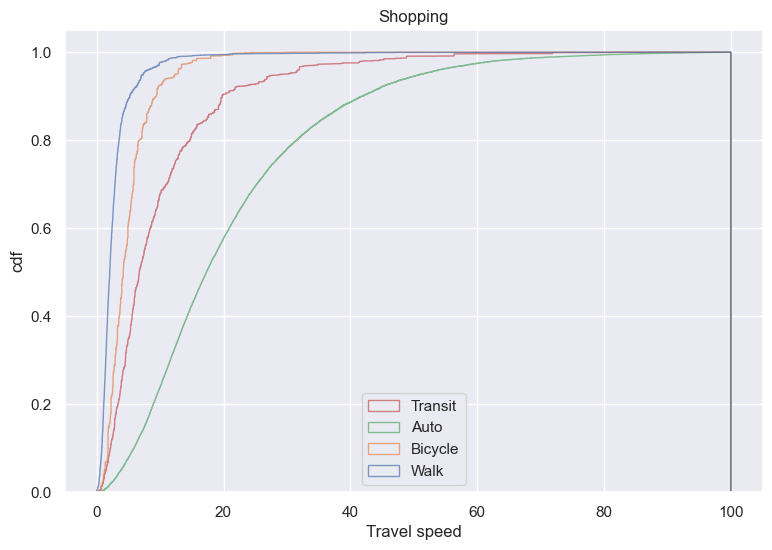

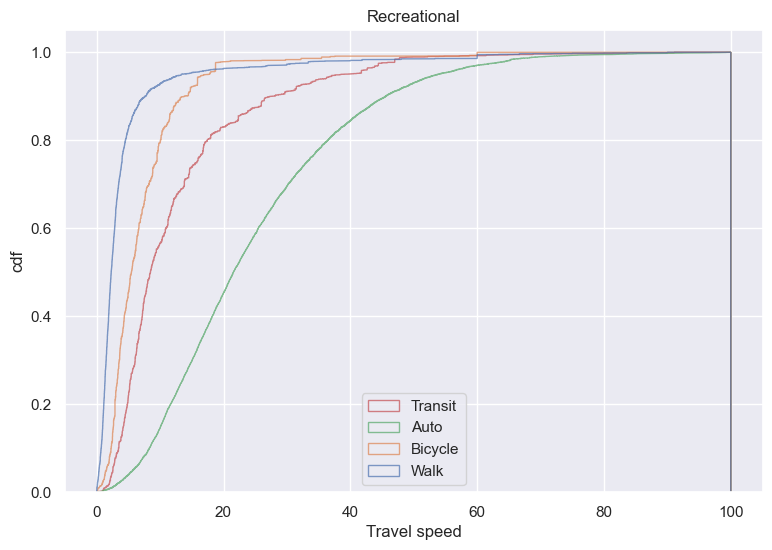

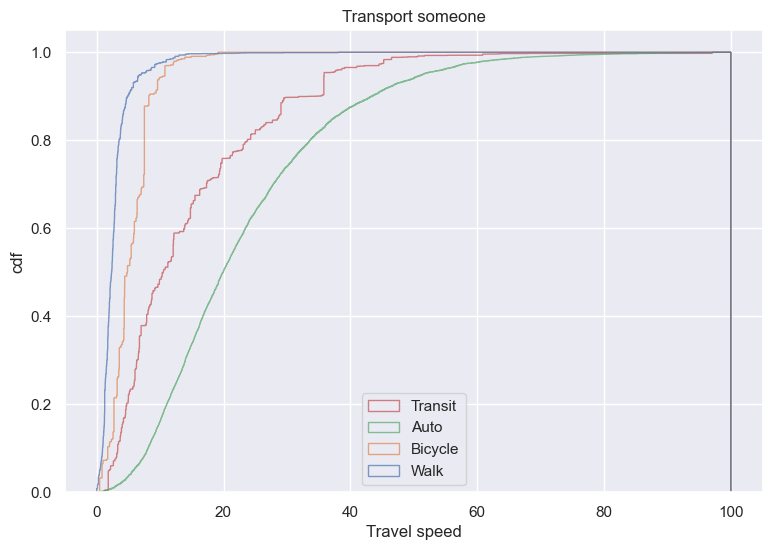

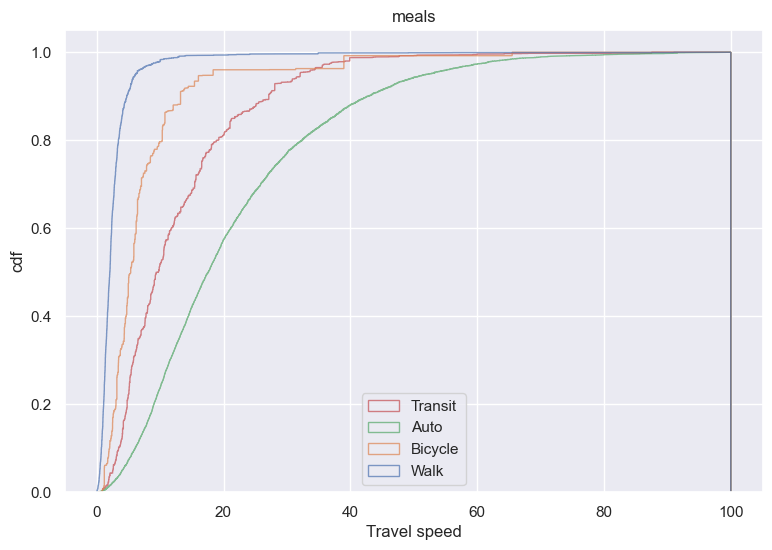

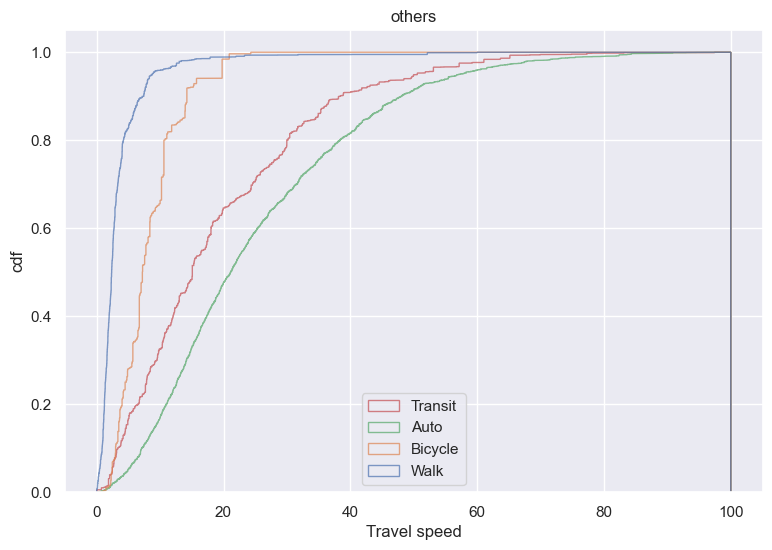

In [15]:
for i in np.arange(1,10):
    ff1=af4[(af4['TRPTRANS']==1)&(af4['WHYTRP1S']==i)]
    ff2=af4[(af4['TRPTRANS']==2)&(af4['WHYTRP1S']==i)]
    ff3=af4[(af4['TRPTRANS']==3)&(af4['WHYTRP1S']==i)]
    ff4=af4[(af4['TRPTRANS']==4)&(af4['WHYTRP1S']==i)]
    data1f=ff1['speed']
    data2f=ff2['speed']
    data3f=ff3['speed']
    data4f=ff4['speed']
    weight1f=ff1['WTTRDFIN']
    weight2f=ff2['WTTRDFIN']
    weight3f=ff3['WTTRDFIN']
    weight4f=ff4['WTTRDFIN']
    dataf=[data1f,data2f,data3f,data4f]
    weightf=[weight1f,weight2f,weight3f,weight4f]
    title=['Home','work','School','Medical','Shopping','Recreational','Transport someone','meals','others']
    fig = plt.figure(figsize=(9, 6))
    plt.hist(dataf, bins=5000, density=True,range=(0,100), cumulative= True, label=label1,alpha=0.7,histtype='step',weights=weightf)
    plt.xlabel('Travel speed')
    plt.ylabel('cdf')
    plt.title(title[i-1])
    plt.legend()
    plt.show()